In [59]:
import uproot
import numpy as np 
import sys,os
import matplotlib
import matplotlib.pyplot as plt

In [53]:
path = "/mnt/sda2/tofpet_data/two_preamp/"
filename = "data/data_calibration_test_8pe_single.root"
filename = path + filename

In [54]:
def decomp_channelID(channelIDabs):
        portID, slaveID, chipID, channelID = channelIDabs>>17, channelIDabs>>12 & 0b11111, channelIDabs>>6 & 0b111111, channelIDabs & 0b111111
        return portID, slaveID, chipID, channelID      

In [55]:
file = uproot.open(filename)
tree = file["data"]
data = tree.arrays(tree.keys())
branches = tree.keys()
nevents = len(data["channelID"])
channelIDs = np.sort(np.unique(data["channelID"]))
channelIDs_decomp = [decomp_channelID(i) for i in channelIDs]

In [56]:
branches[5]

'energy'

In [105]:
def plot_hist(data, key, channel=None, range=None, bins=100):
      
        if channel is not None:
            h = np.histogram(data[key][data["channelID"]==int(channel)], range = range, bins=bins)
        else:
            h = np.histogram(data[key],range = range, bins=bins)
        return h

def plot_hists(data, key, channels=[0], range=None, bins=100):
        # Calculate histograms
        all_hists=[]
        all_x = []
        for channel in channels:
            h = plot_hist(data, key, channel=channel, range=range, bins=100)        
            all_hists.append(h)
            all_x.append(h[1])
        

        # Remake hist with common range    
        if range is None:
            range_common = [0,50]
            all_hists=[]
            for channel in channels:
                h = plot_hist(data, key, channel=channel, range=range_common, bins=100)  
                all_hists.append(h)             
        # Make plots
        plt.step(np.array(h[1][:-1]), np.array(h[0]), label=f"All channels")
        plt.xlim((0,50))  

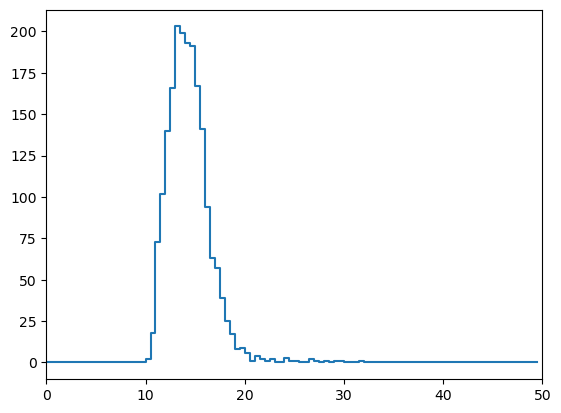

In [106]:

plot_hists(data,branches[5],channels=[294])

In [107]:
def plot_mult_file_energy(filenames):
    for f in filenames:    
        path = "/mnt/sda2/tofpet_data/two_preamp/"
        filename = path + f
        file = uproot.open(filename)
        tree = file["data"]
        data = tree.arrays(tree.keys())
        branches = tree.keys()
        nevents = len(data["channelID"])
        channelIDs = np.sort(np.unique(data["channelID"]))
        channelIDs_decomp = [decomp_channelID(i) for i in channelIDs]
        plot_hists(data,branches[5],channels=[294])
        
    

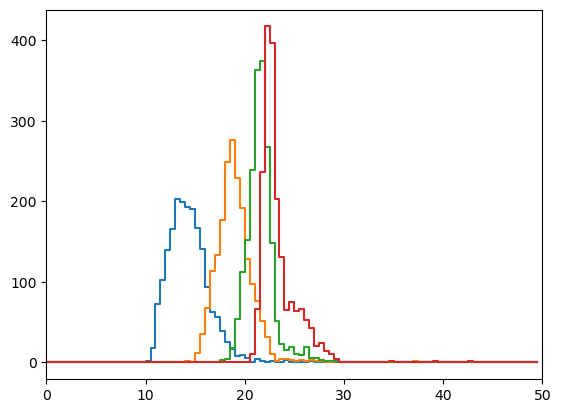

In [108]:
plot_mult_file_energy
(["data/data_calibration_test_8pe_single.root","data/data_calibration_test_14pe_single.root","data/data_calibration_test_20pe_single.root","data/data_calibration_test_26pe_single.root"])